### Project Objectives

Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:<br>
* Billing for services that were not provided.<br>
* Duplicate submission of a claim for the same service.<br>
* Misrepresenting the service provided.<br>
*  Charging for a more complex or expensive service than was actually provided.<br>
* Billing for a covered service when the service actually provided was not covered.

### Problem Statement

The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them. Along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

### Introduction to the Dataset

For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider.<br>
Lets see their details :<br>
* Inpatient Data:<br>
This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.<br>
* Outpatient Data:<br>
This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.<br>
* Beneficiary Details Data:<br>
This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

### Defintions:<br>
* DOB: Date of birth
* DOD: Date of death
* Part A coverage: Medicare Part A, often referred to as hospital insurance, primarily covers inpatient care in hospitals, skilled nursing facilities, hospice care, and some home health services.<br>
* Part B coverage: Medicare Part B is a component of Original Medicare that covers medically necessary services and preventive care, such as doctor visits, outpatient care, and certain medical supplies.<br>
* IPAnnualReimbursementAmt: This refers to the total amount reimbursed by the insurance provider for inpatient (IP) services over a year. It represents the financial compensation received for covered inpatient medical expenses.<br>
* OPAnnualReimbursementAmt: Similar to the inpatient counterpart, this term denotes the total amount reimbursed by the insurance provider for outpatient (OP) services over a year. It reflects the financial compensation for covered outpatient medical expenses.<br>
* IPAnnualDeductibleAmt: This is the total amount that an individual must pay out-of-pocket for inpatient services before the insurance coverage begins to reimburse any costs. It is a yearly threshold that must be met.<br>
* OPAnnualDeductibleAmt: This indicates the total out-of-pocket expense that an individual must cover for outpatient services before their insurance starts to pay for those costs. Like the inpatient deductible, it is calculated annually. 

In [1236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import joblib
from fastapi import FastAPI, HTTPException

In [1237]:
# open datasets
test_beneficiary = pd.read_csv("data_base/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("data_base/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("data_base/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("data_base/Test-1542969243754.csv")
train_beneficiary = pd.read_csv("data_base/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("data_base/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("data_base/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("data_base/Train-1542865627584.csv")

#### Beneficiaries Data Set.

In [1238]:
test_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [1239]:
test_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  object
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [1240]:
test_beneficiary.shape

(63968, 25)

In [1241]:
# checking for duplicates on beneficiaries column.
# display duplicated beneficiaries in the column.
print(f"There are {test_beneficiary['BeneID'].duplicated().sum()} duplicate beneficiaries.")

There are 0 duplicate beneficiaries.


In [1242]:
# display unique number of beneficiaries.
print(f"There are {len(test_beneficiary.BeneID.unique())} unique beneficiaries.")

There are 63968 unique beneficiaries.


#### Beneficiaries by Gender.

In [1243]:
# distribution of beneficiaries by gender
gender_distribution = test_beneficiary['Gender'].value_counts()
print("Distribution of Beneficiaries by Gender:")
print(gender_distribution)

Distribution of Beneficiaries by Gender:
Gender
2    36721
1    27247
Name: count, dtype: int64


In [1244]:
# calculate percentage distribution
percentage_distribution = (test_beneficiary['Gender'].value_counts(normalize=True) * 100).round(2)
print("\nPercentage Distribution:")
print(percentage_distribution)


Percentage Distribution:
Gender
2    57.41
1    42.59
Name: proportion, dtype: float64


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/1935555145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=test_beneficiary, x='Gender',


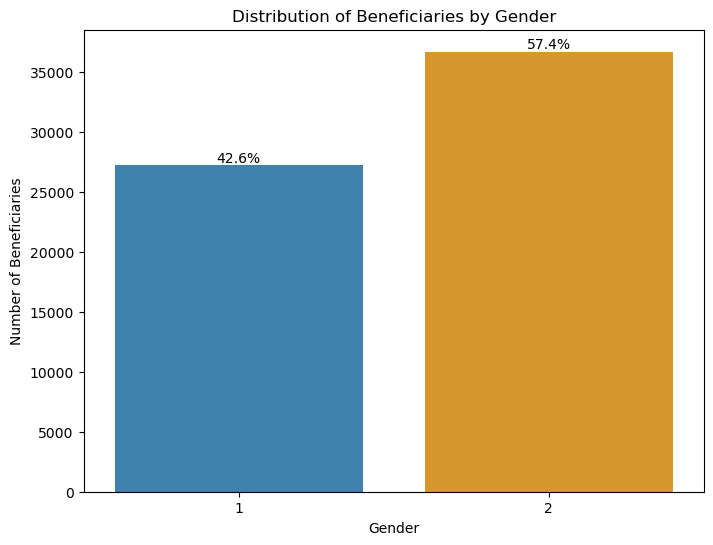

In [1245]:
# create the plot
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=test_beneficiary, x='Gender', 
                  palette=['#2E86C1', '#F39C12'])

# Calculate percentages
total = len(test_beneficiary)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Beneficiaries by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Beneficiaries')
plt.show()

#### Beneficiaries by Year of Birth.

##### DOB column is object, we have to convert it into datetime type in order to manipulate it.

In [1246]:
# Simple conversion (since it's in standard ISO format)
test_beneficiary['DOB'] = pd.to_datetime(test_beneficiary['DOB'])

# Verify the conversion
print("New data type:", test_beneficiary['DOB'].dtype)

# Display a few examples to confirm the conversion
print("\nFirst few dates after conversion:")
print(test_beneficiary['DOB'].head())

New data type: datetime64[ns]

First few dates after conversion:
0   1943-01-01
1   1940-09-01
2   1936-07-01
3   1914-03-01
4   1938-04-01
Name: DOB, dtype: datetime64[ns]


In [1247]:
test_beneficiary['Year'] = test_beneficiary['DOB'].dt.year
# group by year and count the number of beneficiaries
beneficiaries_by_year = test_beneficiary.groupby('Year').size().reset_index(name='Count')
beneficiaries_by_year.head()

,Year,Count
0,1909,361
1,1910,342
2,1911,337
3,1912,352
4,1913,356


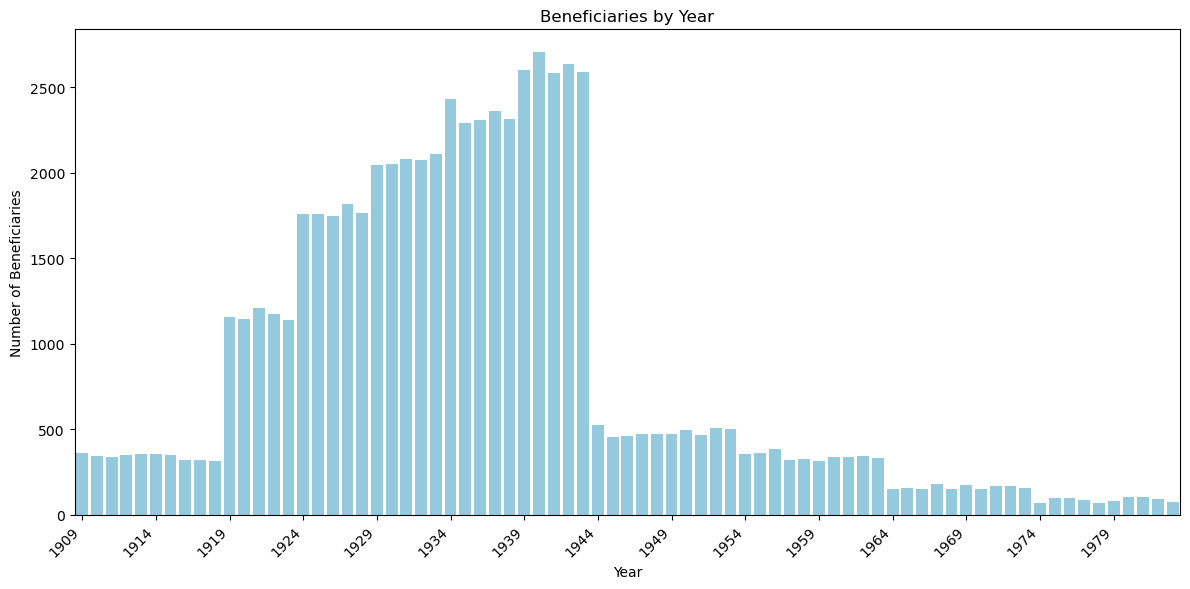

In [1248]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', data=beneficiaries_by_year, color='skyblue')

# Adjust x-axis to show every 5th year
xticks = beneficiaries_by_year['Year'][::5]
plt.xticks(ticks=range(0, len(beneficiaries_by_year), 5), labels=xticks, rotation=45, ha='right')

plt.xlabel('Year')
plt.ylabel('Number of Beneficiaries')
plt.title('Beneficiaries by Year')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

##### Most of beneficiaries are born between 1919-1943.<br>
##### We can categorize beneficiaries by year in 6 groups:<br>
* 1. 1909-1918.<br>
* 2. 1919-1943.<br>
* 3. 1944-1953.<br>
* 4. 1954-1963.<br>
* 5. 1964-1973.<br>
* 6. 1974-1983.

In [1249]:
# Define the year ranges and corresponding group labels
bins = [1908, 1918, 1943, 1953, 1963, 1973, 1983]  # Bin edges
labels = ['1909-1918', '1919-1943', '1944-1953', '1954-1963', '1964-1973', '1974-1983']  # Bin labels

# Create a new column for the year groups
beneficiaries_by_year['Year_Category'] = pd.cut(beneficiaries_by_year['Year'], bins=bins, labels=labels, right=True)

# Group by the year groups and count the number of beneficiaries
beneficiaries_by_category = beneficiaries_by_year.groupby('Year_Category')['Count'].sum().reset_index()
# Calculate the total number of beneficiaries
total_beneficiaries = beneficiaries_by_category['Count'].sum()
# Display the result
beneficiaries_by_category

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/807018879.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  beneficiaries_by_category = beneficiaries_by_year.groupby('Year_Category')['Count'].sum().reset_index()


,Year_Category,Count
0,1909-1918,3411
1,1919-1943,49849
2,1944-1953,4825
3,1954-1963,3411
4,1964-1973,1600
5,1974-1983,872


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/186935316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year_Category', y='Count', data=beneficiaries_by_category, palette='Blues_d')


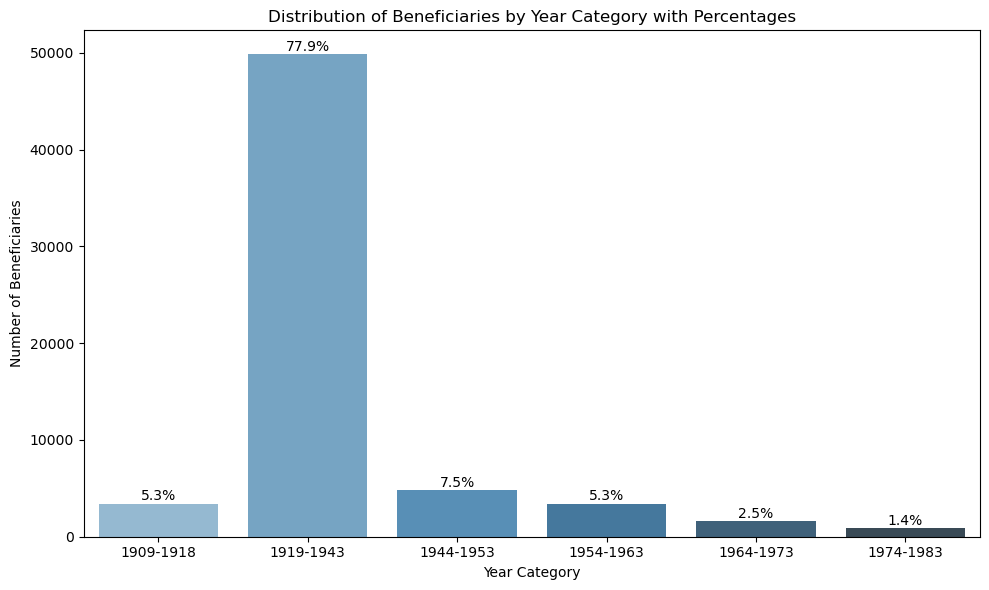

In [1250]:
# calculate the percentage for each category
beneficiaries_by_category['Percentage'] = (beneficiaries_by_category['Count'] / total_beneficiaries) * 100

# plotting the distribution by categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Year_Category', y='Count', data=beneficiaries_by_category, palette='Blues_d')

# adding percentages on top of each bar
for index, row in beneficiaries_by_category.iterrows():
    plt.text(index, row['Count'] + 50, f'{row["Percentage"]:.1f}%', ha='center', va='bottom')

# adding labels and title
plt.xlabel('Year Category')
plt.ylabel('Number of Beneficiaries')
plt.title('Distribution of Beneficiaries by Year Category with Percentages')

# display the plot
plt.tight_layout()
plt.show()

#### Deceased beneficiaries.

##### Let's check the column of DOD.

In [1251]:
# Simple conversion (since it's in standard ISO format)
test_beneficiary['DOD'] = pd.to_datetime(test_beneficiary['DOD'])

# Verify the conversion
print("New data type:", test_beneficiary['DOD'].dtype)

# Display a few examples to confirm the conversion
print("\nFirst few dates after conversion:")
print(test_beneficiary['DOD'].head())

New data type: datetime64[ns]

First few dates after conversion:
0          NaT
1   2009-12-01
2          NaT
3          NaT
4          NaT
Name: DOD, dtype: datetime64[ns]


In [1252]:
test_beneficiary['DOD'].unique()

<DatetimeArray>
[                'NaT', '2009-12-01 00:00:00', '2009-09-01 00:00:00',
 '2009-05-01 00:00:00', '2009-08-01 00:00:00', '2009-10-01 00:00:00',
 '2009-06-01 00:00:00', '2009-07-01 00:00:00', '2009-02-01 00:00:00',
 '2009-04-01 00:00:00', '2009-11-01 00:00:00', '2009-03-01 00:00:00',
 '2009-01-01 00:00:00']
Length: 13, dtype: datetime64[ns]

##### There are only dead dates for year 2009.

##### Let's investigate the rows of patients who are dead.

In [1253]:
# Calculate the age by subtracting DOB from DOD and getting the difference in years
test_beneficiary['Age_at_death'] = (test_beneficiary['DOD'] - test_beneficiary['DOB']).dt.days / 365.25

# Round the age to the nearest integer
test_beneficiary['Age_at_death'] = test_beneficiary['Age_at_death'].round()

# Check the distribution of ages, you can use:
print(test_beneficiary['Age_at_death'].describe())


count    574.000000
mean      74.412892
std       11.110672
min       37.000000
25%       68.000000
50%       75.000000
75%       82.000000
max      100.000000
Name: Age_at_death, dtype: float64


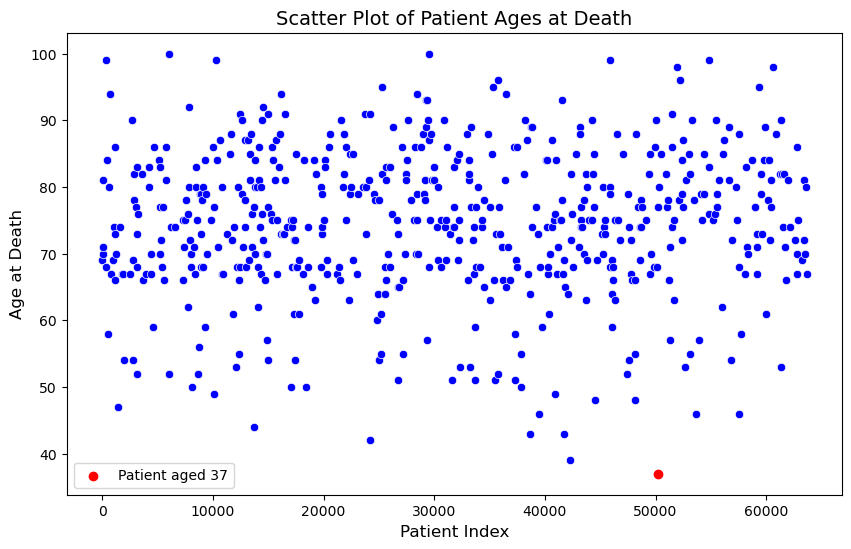

In [1254]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_beneficiary.index, y=test_beneficiary['Age_at_death'], color='blue')

# Highlight the patient who died at the age of 37
patient_37 = test_beneficiary[test_beneficiary['Age_at_death'] == 37]
plt.scatter(patient_37.index, patient_37['Age_at_death'], color='red', label='Patient aged 37')

# Title and labels
plt.title('Scatter Plot of Patient Ages at Death', fontsize=14)
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Age at Death', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()

##### We can conclude that the minimum age of death is not an outlier, also there is no specific pattern of ages through the patients, the ages are distributed uniformly from the minimum to the maximum.

##### Average death age is 74 years old amongst 574 patients. Date of death only for 2009. Missing data for any other years.

#### Beneficiaries by Race.

In [1255]:
# group by race and count the number of beneficiaries
beneficiaries_by_race = test_beneficiary.groupby('Race').size().reset_index(name='Count')
beneficiaries_by_race.head()

,Race,Count
0,1,54105
1,2,6384
2,3,2147
3,5,1332


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/2064551336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=beneficiaries_by_race, x='Race', y='Count',


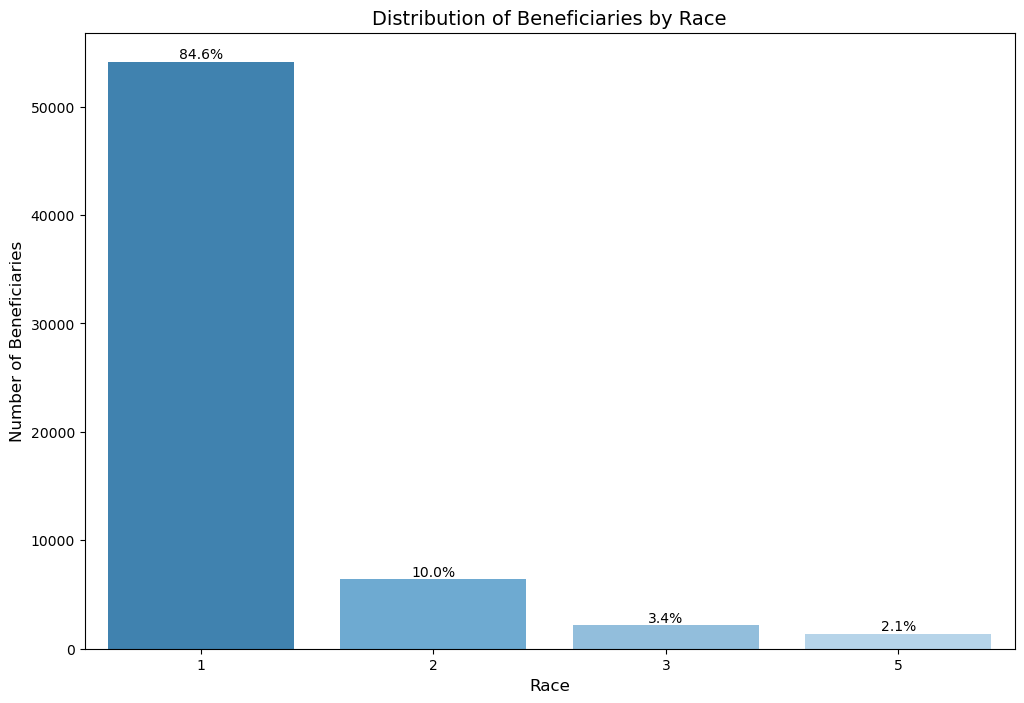

In [1256]:
# create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=beneficiaries_by_race, x='Race', y='Count', 
                 palette=['#2E86C1', '#5DADE2', '#85C1E9', '#AED6F1'])

# calculate the percentage for each category
beneficiaries_by_race['Percentage'] = (beneficiaries_by_race['Count'] / total_beneficiaries) * 100

# adding percentages on top of each bar
for index, row in beneficiaries_by_race.iterrows():
    plt.text(index, row['Count'] + 50, f'{row["Percentage"]:.1f}%', ha='center', va='bottom')

# add title and labels
plt.title('Distribution of Beneficiaries by Race', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Beneficiaries', fontsize=12)

# show the plot
plt.show()



#### Beneficiearies by State.

In [1257]:
# group by state and count the number of beneficiaries
beneficiaries_by_state = test_beneficiary.groupby('State').size().reset_index(name='Count')
beneficiaries_by_state.head()

,State,Count
0,1,1459
1,2,107
2,3,951
3,4,529
4,5,3812


##### There are 54 States in this Dataset.

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/790916460.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues')  # Choose a gradient colormap
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/790916460.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/790916460.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


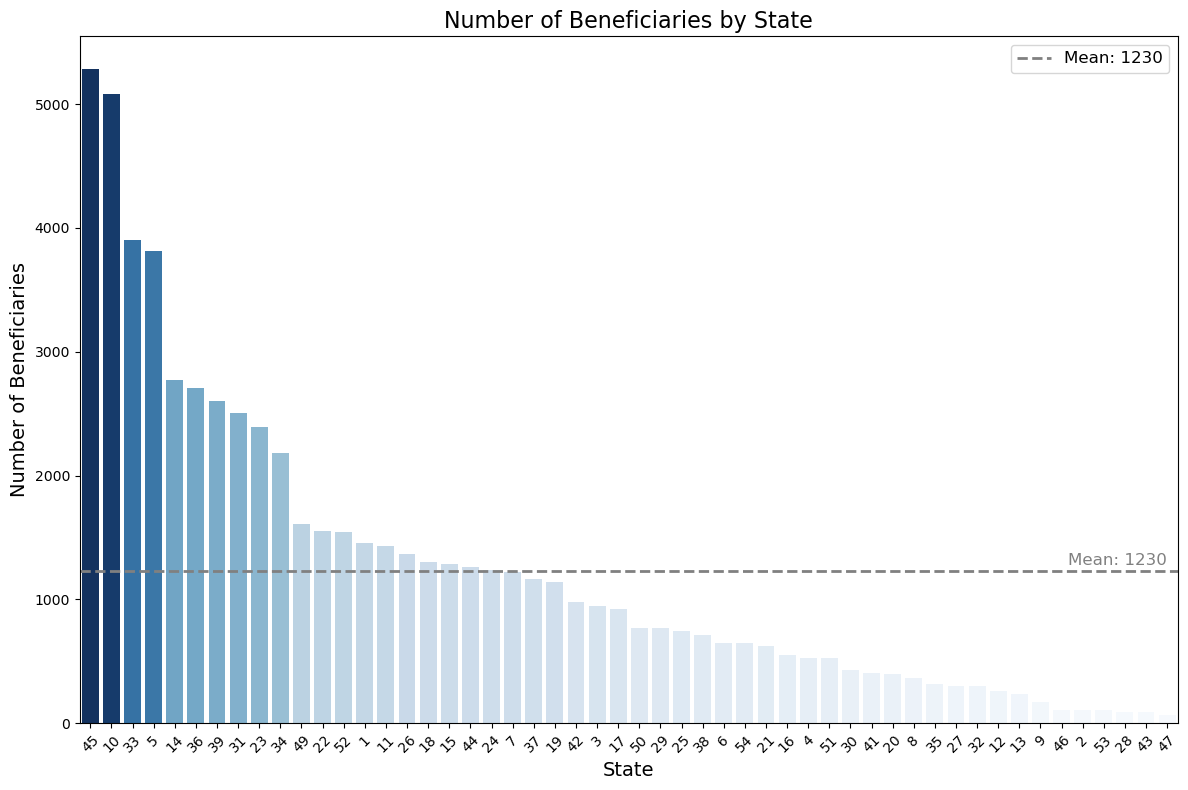

In [1258]:
plt.figure(figsize=(12, 8))

# sort the data in descending order by 'Count'
beneficiaries_by_state_sorted = beneficiaries_by_state.sort_values(by='Count', ascending=False)

# normalize the counts to create a gradient effect
normalized_counts = beneficiaries_by_state_sorted['Count'] / beneficiaries_by_state_sorted['Count'].max()

# use a colormap to generate colors based on normalized counts
colormap = cm.get_cmap('Blues')  # Choose a gradient colormap
colors = colormap(normalized_counts)

# create the bar plot with explicit order for the x-axis
ax = sns.barplot(
    data=beneficiaries_by_state_sorted,
    x='State',
    y='Count',
    palette=colors,
    order=beneficiaries_by_state_sorted['State']
)

# calculate total number of beneficiaries and mean
total_beneficiaries = beneficiaries_by_state_sorted['Count'].sum()
mean_beneficiaries = beneficiaries_by_state_sorted['Count'].mean()

# add an average line
plt.axhline(mean_beneficiaries, color='grey', linestyle='--', linewidth=2, label=f'Mean: {mean_beneficiaries:.0f}')

# annotate the value of the mean on the line
plt.text(
    x=len(beneficiaries_by_state_sorted) - 1,  # Position near the end of the x-axis
    y=mean_beneficiaries + 50,  # Slightly above the line for visibility
    s=f'Mean: {mean_beneficiaries:.0f}', 
    color='grey',
    fontsize=12,
    ha='right'
)

# set plot title and labels
plt.title('Number of Beneficiaries by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Beneficiaries', fontsize=14)

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

# add legend for the average line
plt.legend(loc='upper right', fontsize=12)

# show the plot
plt.tight_layout()
plt.show()

In [1259]:
beneficiaries_by_state.describe()

,State,Count
count,52.000000,52.000000
mean,26.865385,1230.153846
std,15.668163,1217.936384
min,1.000000,66.000000
25%,13.750000,390.250000
50%,26.500000,848.500000
75%,39.500000,1480.500000
max,54.000000,5283.000000


#### Beneficiaries by County.

In [1260]:
# group by county and count the number of beneficiaries
beneficiaries_by_county = test_beneficiary.groupby('County').size().reset_index(name='Count')
beneficiaries_by_county.head()

,County,Count
0,0,1447
1,1,1
2,10,1710
3,11,10
4,14,1


In [1261]:
beneficiaries_by_county.describe()

,County,Count
count,285.000000,285.000000
mean,609.238596,224.449123
std,295.477662,373.731830
min,0.000000,1.000000
25%,360.000000,5.000000
50%,670.000000,17.000000
75%,874.000000,323.000000
max,999.000000,1710.000000


##### There are 999 Counties in this Dataset.

##### I'am interested in analyzing more populous counties, to focus on larger data that can provide more meaningful trends.
##### I am going to filter counties with ≥323 beneficiaries, as they are part of the top 25% of counties by population of beneficiaries.

In [1262]:
# filter counties where the count of beneficiaries is >= 323
filtered_beneficiaries_by_county = beneficiaries_by_county[beneficiaries_by_county['Count'] >= 323]

filtered_beneficiaries_by_county.head()

,County,Count
0,0,1447
2,10,1710
5,20,1577
7,30,822
9,40,1262


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/483173258.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues')  # Choose a gradient colormap
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/483173258.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_72504/483173258.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(


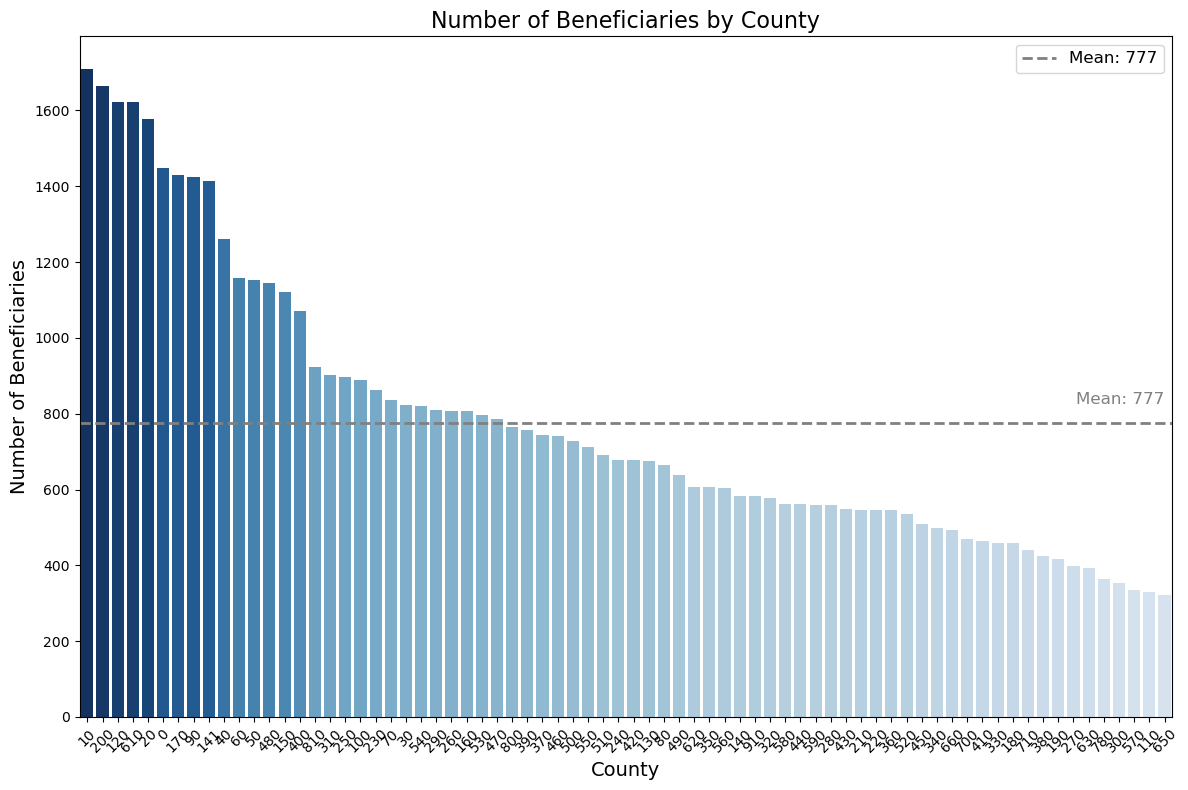

In [1263]:
plt.figure(figsize=(12, 8))

# sort the data in descending order by 'Count'
beneficiaries_by_county_sorted = filtered_beneficiaries_by_county.sort_values(by='Count', ascending=False)

# normalize the counts to create a gradient effect
normalized_counts = beneficiaries_by_county_sorted['Count'] / beneficiaries_by_county_sorted['Count'].max()

# use a colormap to generate colors based on normalized counts
colormap = cm.get_cmap('Blues')  # Choose a gradient colormap
colors = colormap(normalized_counts)

# create the bar plot with explicit order for the x-axis
ax = sns.barplot(
    data=beneficiaries_by_county_sorted,
    x='County',
    y='Count',
    palette=colors,
    order=beneficiaries_by_county_sorted['County']
)

# calculate total number of beneficiaries and mean
total_beneficiaries = beneficiaries_by_county_sorted['Count'].sum()
mean_beneficiaries = beneficiaries_by_county_sorted['Count'].mean()

# add an average line
plt.axhline(mean_beneficiaries, color='grey', linestyle='--', linewidth=2, label=f'Mean: {mean_beneficiaries:.0f}')

# annotate the value of the mean on the line
plt.text(
    x=len(beneficiaries_by_county_sorted) - 1,  # Position near the end of the x-axis
    y=mean_beneficiaries + 50,  # Slightly above the line for visibility
    s=f'Mean: {mean_beneficiaries:.0f}', 
    color='grey',
    fontsize=12,
    ha='right'
)

# set plot title and labels
plt.title('Number of Beneficiaries by County', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Number of Beneficiaries', fontsize=14)

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

# add legend for the average line
plt.legend(loc='upper right', fontsize=12)

# show the plot
plt.tight_layout()
plt.show()

##### Beneficiaries by Chronic Condition.

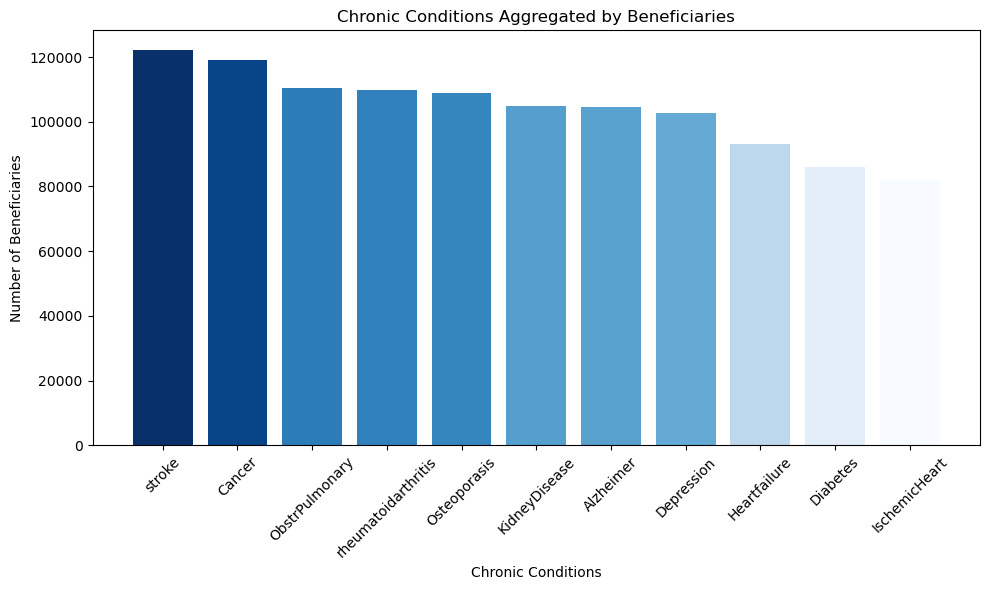

In [1264]:
# Aggregate by summing each chronic condition
aggregated_data = test_beneficiary[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                                    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                                    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                                    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']].sum()

# Sort the aggregated data in descending order
aggregated_data_sorted = aggregated_data.sort_values(ascending=False)

# Create a bar plot with a gradient of blues (from dark to light)
plt.figure(figsize=(10, 6))

# Generate a colormap of blues with a gradient from dark to light
cmap = plt.cm.Blues
norm = plt.Normalize(vmin=min(aggregated_data_sorted.values), vmax=max(aggregated_data_sorted.values))
colors = [cmap(norm(value)) for value in aggregated_data_sorted.values]

bars = plt.bar(aggregated_data_sorted.index, aggregated_data_sorted.values, color=colors)

# Renaming x-axis labels by removing 'ChronicCond_' prefix
new_labels = [label.replace('ChronicCond_', '') for label in aggregated_data_sorted.index]
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)

# Adding labels and title
plt.xlabel('Chronic Conditions')
plt.ylabel('Number of Beneficiaries')
plt.title('Chronic Conditions Aggregated by Beneficiaries')

plt.tight_layout()

# Show the plot
plt.show()


***

##### Annual reinbursement for IP and OP beneficiaries analysis.

In [1265]:
# check statistics to investigate the existence of outliers for IP Patients.
test_beneficiary['IPAnnualReimbursementAmt'].describe()

count     63968.000000
mean       4557.559561
std       10741.954472
min       -1000.000000
25%           0.000000
50%           0.000000
75%        5000.000000
max      155600.000000
Name: IPAnnualReimbursementAmt, dtype: float64

In [1266]:
# check statistics to investigate the existence of outliers for OP Patients.
test_beneficiary['OPAnnualReimbursementAmt'].describe()

count    63968.000000
mean      1664.710324
std       3010.045357
min        -60.000000
25%        290.000000
50%        800.000000
75%       1960.000000
max      97510.000000
Name: OPAnnualReimbursementAmt, dtype: float64

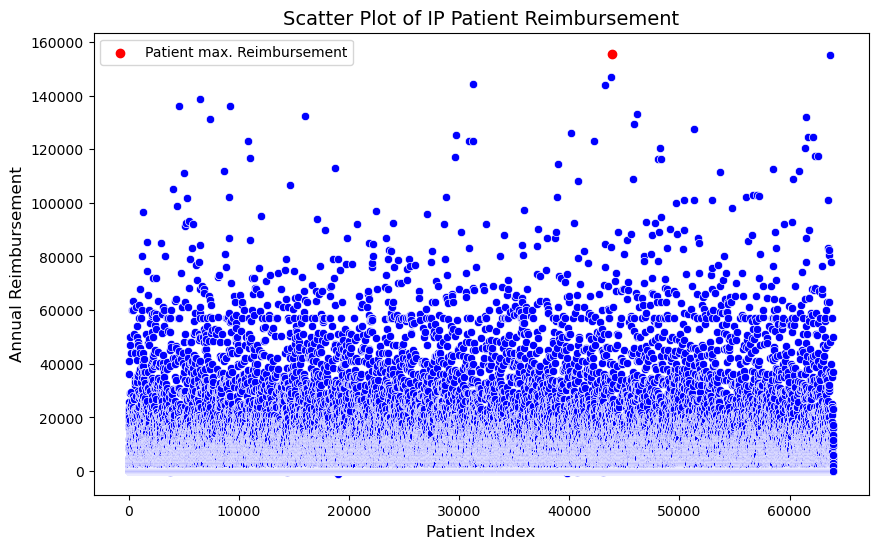

In [1267]:
# create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_beneficiary.index, y=test_beneficiary['IPAnnualReimbursementAmt'], color='blue')

# highlight the patient who died at the age of 37
patient_155600 = test_beneficiary[test_beneficiary['IPAnnualReimbursementAmt'] == 155600]
plt.scatter(patient_155600.index, patient_155600['IPAnnualReimbursementAmt'], color='red', label='Patient max. Reimbursement')

# title and labels
plt.title('Scatter Plot of IP Patient Reimbursement', fontsize=14)
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Annual Reimbursement', fontsize=12)

# show the legend
plt.legend()

# display the plot
plt.show()

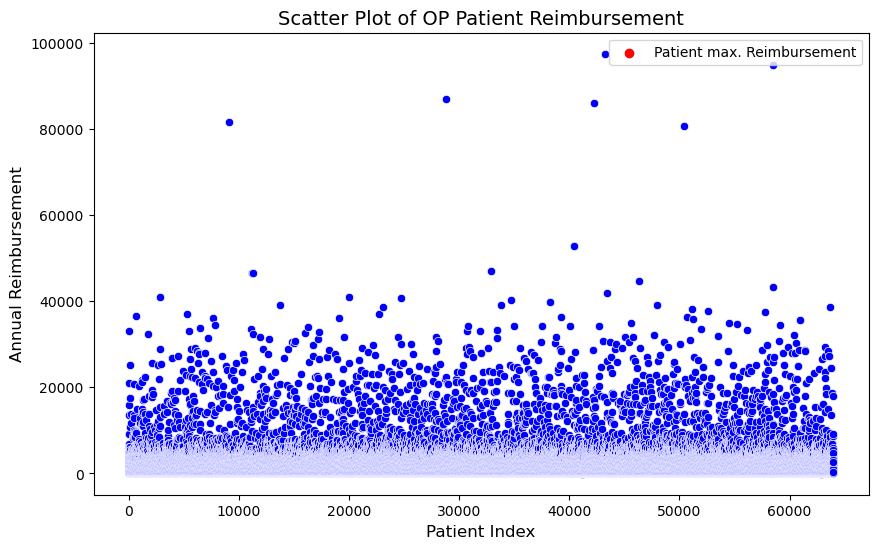

In [1268]:
# create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_beneficiary.index, y=test_beneficiary['OPAnnualReimbursementAmt'], color='blue')

# highlight the patient who died at the age of 37
patient_155600 = test_beneficiary[test_beneficiary['OPAnnualReimbursementAmt'] == 155600]
plt.scatter(patient_155600.index, patient_155600['OPAnnualReimbursementAmt'], color='red', label='Patient max. Reimbursement')

# title and labels
plt.title('Scatter Plot of OP Patient Reimbursement', fontsize=14)
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Annual Reimbursement', fontsize=12)

# show the legend
plt.legend()

# display the plot
plt.show()

##### 🚩 Conclusion: We can see some pattern outside the average behavior of patients on reimbursements received which may indicate fraud movements.

##### Both OP and IP Patients have negative amounts. For the purpose of the analysis we will clean the dataset not taking into consideration the negative values with a clean dataset.

In [1269]:
# filter IP beneficiaries with negative reimbursement amounts
IP_negative_reimbursements = test_beneficiary[test_beneficiary['IPAnnualReimbursementAmt'] < 0]

# count the number of IP beneficiaries with negative reimbursements
IP_count_negative_reimbursements = IP_negative_reimbursements['BeneID'].nunique()

print(f"Number of IP beneficiaries with negative reimbursements: {IP_count_negative_reimbursements}")

Number of IP beneficiaries with negative reimbursements: 9


In [1270]:
IP_negative_reimbursements

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Year,Age_at_death
3752,BENE19571,1938-07-01,NaT,2,1,0,32,230,12,12,...,1,2,2,2,-300,1068,4720,770,1938,NaN
7051,BENE27231,1935-02-01,NaT,1,1,0,42,250,12,12,...,1,1,2,2,-100,1068,1220,770,1935,NaN
14343,BENE44298,1929-02-01,NaT,2,2,0,1,510,12,12,...,1,2,2,2,-300,1068,2430,200,1929,NaN
18972,BENE54894,1926-04-01,NaT,2,1,0,14,141,12,12,...,2,2,2,2,-1000,1068,100,10,1926,NaN
32276,BENE85807,1972-12-01,NaT,1,1,0,44,60,12,12,...,1,2,2,2,-40,1068,170,110,1972,NaN
39800,BENE103244,1925-10-01,NaT,2,1,0,5,370,12,12,...,2,1,2,2,-800,1068,90,0,1925,NaN
39941,BENE103563,1934-07-01,NaT,1,1,0,45,810,12,12,...,1,1,2,2,-10,1068,480,200,1934,NaN
40656,BENE105279,1931-11-01,NaT,2,1,0,34,800,12,12,...,2,2,2,2,-200,1068,1420,840,1931,NaN
43065,BENE110853,1913-06-01,NaT,2,3,0,5,650,12,12,...,1,2,2,2,-200,1068,420,100,1913,NaN


In [1271]:
# filter OP beneficiaries with negative reimbursement amounts
OP_negative_reimbursements = test_beneficiary[test_beneficiary['OPAnnualReimbursementAmt'] < 0]

# count the number of OP beneficiaries with negative reimbursements
OP_count_negative_reimbursements = OP_negative_reimbursements['BeneID'].nunique()

print(f"Number of OP beneficiaries with negative reimbursements: {OP_count_negative_reimbursements}")

Number of OP beneficiaries with negative reimbursements: 2


In [1272]:
OP_negative_reimbursements

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Year,Age_at_death
41108,BENE106343,1929-06-01,NaT,1,1,Y,50,50,12,12,...,1,1,2,2,25000,3204,-60,10,1929,NaN
62866,BENE156652,1914-03-01,NaT,1,1,0,21,150,12,12,...,1,2,2,2,3000,1068,-50,20,1914,NaN


In [1273]:
# check if there are beneficiaries on both datasets.
common_beneficiaries = set(OP_negative_reimbursements['BeneID']) & set(IP_negative_reimbursements['BeneID'])
print(f"Therer are {len(common_beneficiaries)} beneficiaries in both datasets{', '.join(map(str, common_beneficiaries))}.")


Therer are 0 beneficiaries in both datasets.


##### Clean the test_beneficiary dataset removing the negative amounts from the reimbursements and saving the clean dataset.

In [1274]:
# filter out rows with negative values in the specified columns
cleaned_test_beneficiary = test_beneficiary[
    (test_beneficiary['IPAnnualReimbursementAmt'] >= 0) & 
    (test_beneficiary['OPAnnualReimbursementAmt'] >= 0)
]

# save the cleaned DataFrame to a new CSV file
cleaned_test_beneficiary.to_csv("cleaned_test_beneficiary.csv", index=False)

In [1275]:
# check to see if it is clean of the negative values.
cleaned_test_beneficiary['IPAnnualReimbursementAmt'].describe()

count     63957.000000
mean       4557.951749
std       10742.415308
min           0.000000
25%           0.000000
50%           0.000000
75%        5000.000000
max      155600.000000
Name: IPAnnualReimbursementAmt, dtype: float64

##### Next are same steps but for the Out Patient dataset.

In [1276]:
# check if the data set is clean of negative values.
cleaned_test_beneficiary['OPAnnualReimbursementAmt'].describe()

count    63957.000000
mean      1664.825586
std       3010.236134
min          0.000000
25%        290.000000
50%        800.000000
75%       1960.000000
max      97510.000000
Name: OPAnnualReimbursementAmt, dtype: float64

##### 🚩 Conclusion: The beneficiaries who may seem outliers are actually not outliers as they may identify fraudulent movement.

***

#### Patients who were admitted in the hospital.

In [1277]:
test_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1278]:
test_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  9551 non-null   object 
 1   ClaimID                 9551 non-null   object 
 2   ClaimStartDt            9551 non-null   object 
 3   ClaimEndDt              9551 non-null   object 
 4   Provider                9551 non-null   object 
 5   InscClaimAmtReimbursed  9551 non-null   int64  
 6   AttendingPhysician      9520 non-null   object 
 7   OperatingPhysician      5589 non-null   object 
 8   OtherPhysician          1013 non-null   object 
 9   AdmissionDt             9551 non-null   object 
 10  ClmAdmitDiagnosisCode   9551 non-null   object 
 11  DeductibleAmtPaid       9355 non-null   float64
 12  DischargeDt             9551 non-null   object 
 13  DiagnosisGroupCode      9551 non-null   object 
 14  ClmDiagnosisCode_1      9551 non-null   

In [1279]:
test_inpatient['InscClaimAmtReimbursed'].describe()

count      9551.000000
mean      10105.306251
std       10316.862711
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [1280]:
# checking for duplicates on claims column.
# display duplicated claims in the column.
print(f"There are {test_inpatient['ClaimID'].duplicated().sum()} duplicate Claims.")

There are 0 duplicate Claims.


In [1281]:
# check unique Providers.
print(test_inpatient['Provider'].nunique())

520


In [1282]:
# join both tables on BeneID
merged_df = pd.merge(test_beneficiary, test_inpatient, on='BeneID', how='inner')

# ensure the DOD and ClaimsStartDt columns are in datetime format
merged_df['DOD'] = pd.to_datetime(merged_df['DOD'], errors='coerce')
merged_df['ClaimStartDt'] = pd.to_datetime(merged_df['ClaimStartDt'], errors='coerce')
merged_df['ClaimEndDt'] = pd.to_datetime(merged_df['ClaimEndDt'], errors='coerce')
merged_df['AdmissionDt'] = pd.to_datetime(merged_df['AdmissionDt'], errors='coerce')
merged_df['DischargeDt'] = pd.to_datetime(merged_df['DischargeDt'], errors='coerce')

# filter beneficiaries where ClaimsStartDt is later than DOD
claims_after_dod = merged_df[merged_df['ClaimStartDt'] > merged_df['DOD']]

# count the number of unique beneficiaries and total claims
num_beneficiaries = claims_after_dod['BeneID'].nunique()  # Count unique beneficiaries
num_claims = claims_after_dod.shape[0]  # Total number of claims

# print the result
print(f"There are {num_beneficiaries} beneficiaries who filed {num_claims} claims after they were deceased.")

There are 0 beneficiaries who filed 0 claims after they were deceased.


#### There are no Beneficiaries who filed claims after they died.

In [1283]:
ended_claims_after_dod = merged_df[merged_df['ClaimEndDt'] > merged_df['DOD']]

num_beneficiaries = ended_claims_after_dod['BeneID'].nunique()

print(f"There are {num_beneficiaries} beneficiaries who ended their claims after they were deceased.")

There are 0 beneficiaries who ended their claims after they were deceased.


#### There are no Beneficiaries who ended their claims after they died.

In [1284]:
admissions_after_dod = merged_df[merged_df['AdmissionDt'] > merged_df['DOD']]

num_beneficiaries = admissions_after_dod['BeneID'].nunique()

print(f"There are {num_beneficiaries} beneficiaries who were admitted after they were deceased.")

There are 0 beneficiaries who were admitted after they were deceased.


#### There are no Beneficiaries who were admitted after they died.

In [1285]:
discharged_after_dod = merged_df[merged_df['DischargeDt'] > merged_df['DOD']]

num_beneficiaries = discharged_after_dod['BeneID'].nunique()

print(f"There are {num_beneficiaries} beneficiaries who were discharged after they were deceased.")

There are 0 beneficiaries who were discharged after they were deceased.


#### There are no Beneficiaries who were discharged after they died.

In [1286]:
# Filter beneficiaries who have a non-null DischargeDt and InsClaimAmtReimbursed equal to 0
filtered_beneficiaries = test_inpatient[(test_inpatient['DischargeDt'].notnull()) & (test_inpatient['InscClaimAmtReimbursed'] == 0)]

# Count the number of unique BeneID values that meet the condition
filtered_beneficiaries_count = filtered_beneficiaries['BeneID'].nunique()

# Print the result
print(f"Number of beneficiaries who received a service but had 0 reimbursement: {filtered_beneficiaries_count}")

Number of beneficiaries who received a service but had 0 reimbursement: 253


In [1287]:
# Filter beneficiaries who have a non-null DischargeDt and InsClaimAmtReimbursed equal to 0
filtered_beneficiaries = test_inpatient[(test_inpatient['DischargeDt'].notnull()) & (test_inpatient['DeductibleAmtPaid'] == 0)]

# Count the number of unique BeneID values that meet the condition
filtered_beneficiaries_count = filtered_beneficiaries['BeneID'].nunique()

# Print the result
print(f"Number of beneficiaries who received a service but paid 0 deductible amount for the service: {filtered_beneficiaries_count}")

Number of beneficiaries who received a service but paid 0 deductible amount for the service: 0


In [1288]:
# Filter beneficiaries who have a non-null DischargeDt and InsClaimAmtReimbursed equal to 0
filtered_beneficiaries = test_inpatient[(test_inpatient['DischargeDt'].notnull()) & (test_inpatient['InscClaimAmtReimbursed'] == 0) & (test_inpatient['DeductibleAmtPaid'] == 0)]

# Count the number of unique BeneID values that meet the condition
filtered_beneficiaries_count = filtered_beneficiaries['BeneID'].nunique()

# Print the result
print(f"Number of beneficiaries who received a service but had 0 reimbursement and paid the deductable amount for the service: {filtered_beneficiaries_count}")

Number of beneficiaries who received a service but had 0 reimbursement and paid the deductable amount for the service: 0


In [1289]:
# Filter beneficiaries who have a non-null DischargeDt and InsClaimAmtReimbursed equal to 0
filtered_beneficiaries = test_inpatient[(test_inpatient['DischargeDt'].notnull()) & (test_inpatient['InscClaimAmtReimbursed'] == 0) & (test_inpatient['DeductibleAmtPaid'] > 0)]

# Count the number of unique BeneID values that meet the condition
filtered_beneficiaries_count = filtered_beneficiaries['BeneID'].nunique()

# Print the result
print(f"Number of beneficiaries who received a service but had 0 reimbursement and paid the deductable amount for the service: {filtered_beneficiaries_count}")

Number of beneficiaries who received a service but had 0 reimbursement and paid the deductable amount for the service: 247


In [1290]:
# Group by 'ClmAdmitDiagnosisCode' and count the number of unique 'BeneID' for each diagnosis code
in_grouped_by_diagnosis = test_inpatient.groupby('DiagnosisGroupCode')['BeneID'].nunique().reset_index(name='BeneficiaryCount')

# Print the result
in_grouped_by_diagnosis.describe()

,BeneficiaryCount
count,712.000000
mean,13.403090
std,10.131159
min,1.000000
25%,6.000000
50%,11.000000
75%,18.000000
max,51.000000


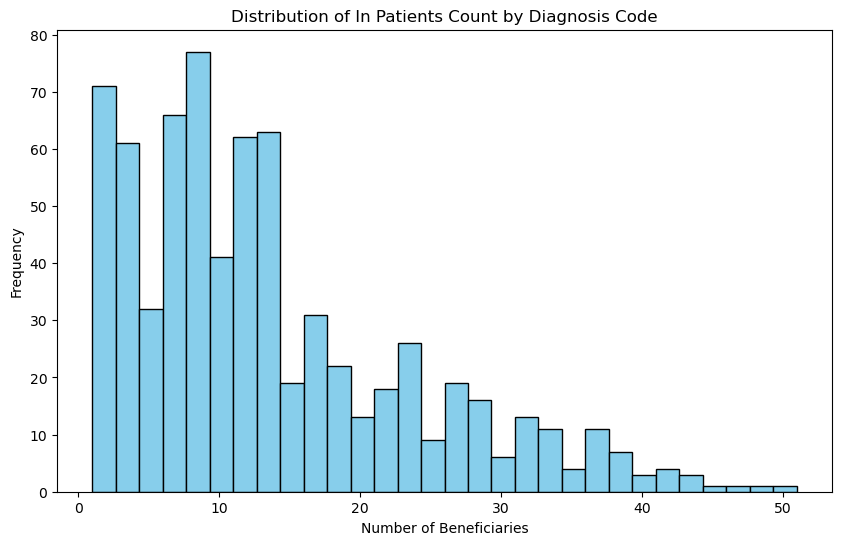

In [1291]:
# Plot a histogram of the BeneficiaryCount
plt.figure(figsize=(10, 6))
plt.hist(in_grouped_by_diagnosis['BeneficiaryCount'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of In Patients Count by Diagnosis Code')
plt.xlabel('Number of Beneficiaries')
plt.ylabel('Frequency')
plt.show()

In [1292]:
# Group by 'ClmAdmitDiagnosisCode' and count the number of unique 'BeneID' for each diagnosis code
out_grouped_by_diagnosis = test_outpatient.groupby('ClmAdmitDiagnosisCode')['BeneID'].nunique().reset_index(name='BeneficiaryCount')

# Print the result
out_grouped_by_diagnosis.describe()

,BeneficiaryCount
count,2303.000000
mean,11.115502
std,43.359123
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,981.000000


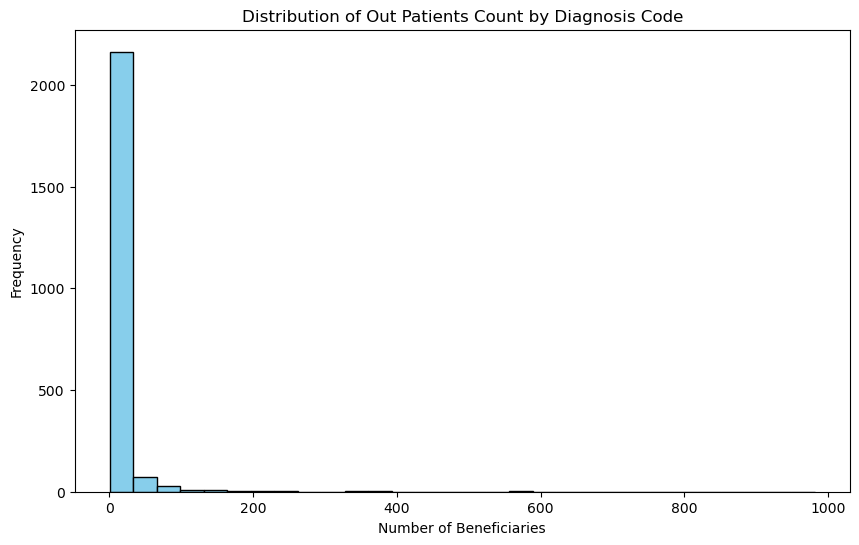

In [1293]:
# Plot a histogram of the BeneficiaryCount
plt.figure(figsize=(10, 6))
plt.hist(out_grouped_by_diagnosis['BeneficiaryCount'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Out Patients Count by Diagnosis Code')
plt.xlabel('Number of Beneficiaries')
plt.ylabel('Frequency')
plt.show()

##### This bar plot shows the distribution of the count of in-patients by diagnosis code.<br>
- Skewed Distribution: The data appears to be right-skewed, with most diagnosis codes having fewer beneficiaries. This is evident from the high frequency of bars on the lower end of the x-axis.<br>
- Potential Anomalies: The presence of fewer bars in the higher range (above 30 beneficiaries) suggests that most providers cater to a limited number of beneficiaries per diagnosis code. However, some diagnosis codes with higher beneficiary counts (30-50) could indicate outliers, potentially warranting further investigation for fraud.

In [1325]:
# Step 1: Remove irrelevant columns
columns_to_remove = ['ClaimID', 'BeneID', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt']
cleaned_data = test_inpatient.drop(columns=columns_to_remove)

In [1326]:
# Step 2: Remove columns with too many missing values or columns that don't add value to the correlation
# Removing columns with a high percentage of missing values (e.g., procedure codes with more than 90% missing)
cleaned_data = cleaned_data.dropna(thresh=0.1*len(cleaned_data), axis=1)

In [1327]:
# Step 3: Check if any columns are of object type (in case some non-numeric columns exist) 
columns_to_convert = cleaned_data.select_dtypes(include=['object']).columns
cleaned_data[columns_to_convert] = cleaned_data[columns_to_convert].notna().astype(int)

In [1328]:
# Step 4: Calculate the correlation matrix
correlation_matrix = cleaned_data.corr()

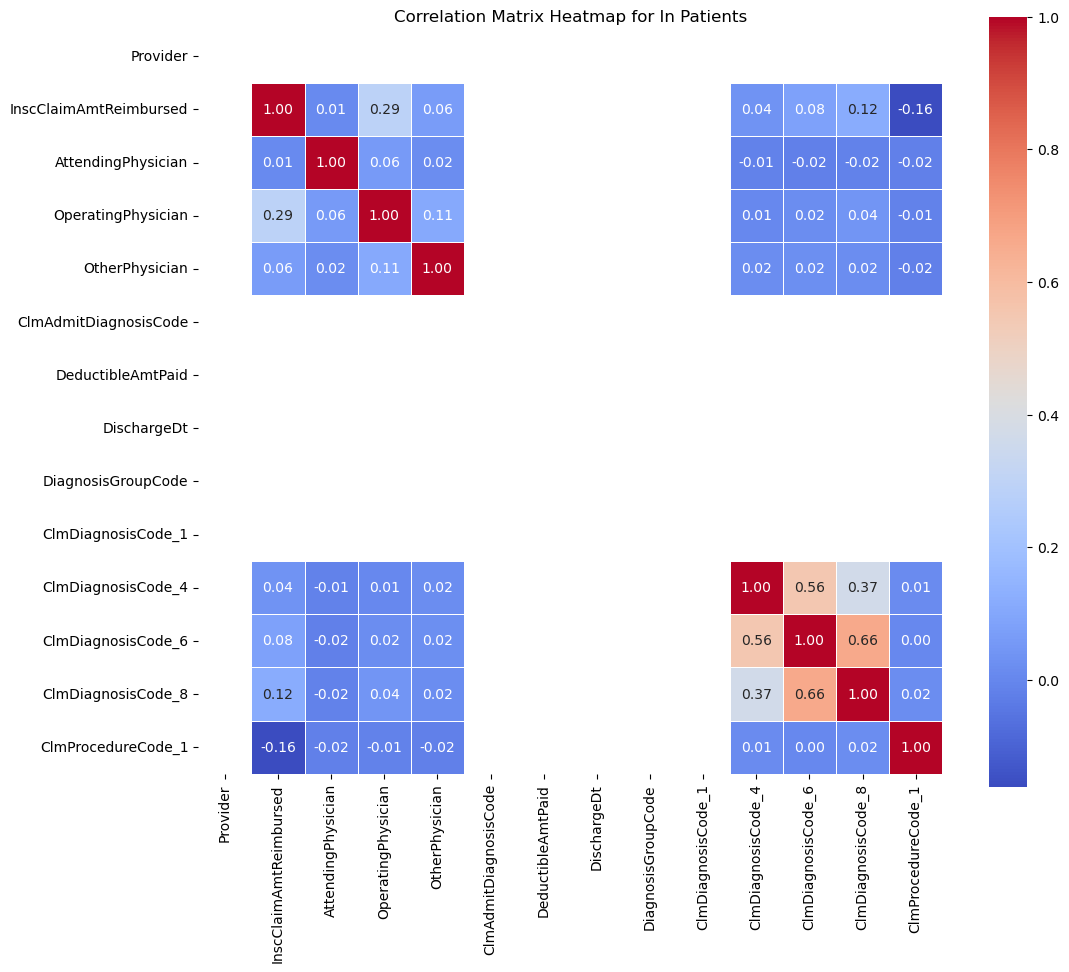

In [1355]:
# Step 5: Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)

# Step 6: Display the heatmap
plt.title('Correlation Matrix Heatmap for In Patients')
plt.show()

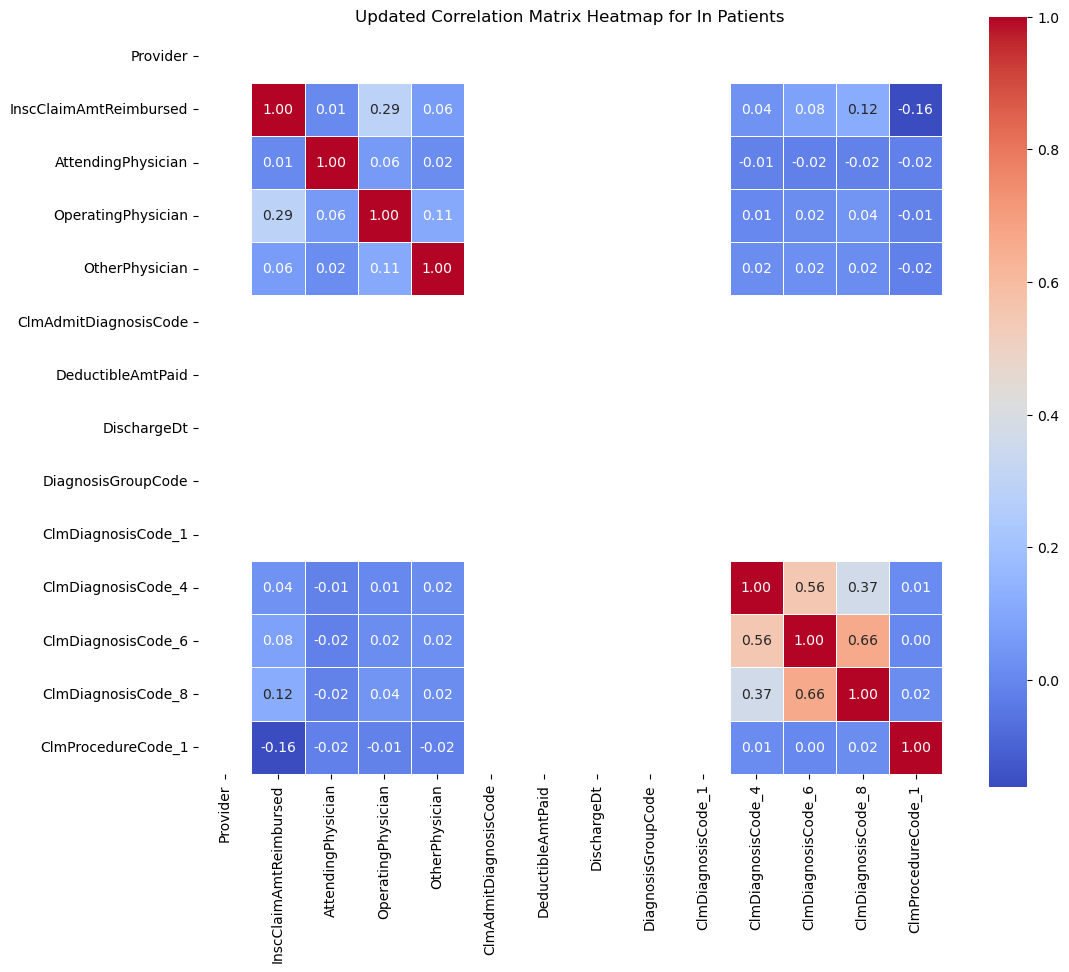

In [1356]:
# Drop highly correlated columns
columns_to_drop = [
    'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_5',
    'ClmDiagnosisCode_7', 'ClmDiagnosisCode_9', 'ClmProcedureCode_2'
]

# Dropping the identified columns
cleaned_inpatient_data = cleaned_data.drop(columns=columns_to_drop)

# Recalculate the correlation matrix
correlation_matrix = cleaned_inpatient_data.corr()

# Plot the updated heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title('Updated Correlation Matrix Heatmap for In Patients')
plt.show()


***

#### Patients who visited the hospital but were not admited in the hospital.

In [1331]:
test_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [1332]:
test_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125841 entries, 0 to 125840
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  125841 non-null  object 
 1   ClaimID                 125841 non-null  object 
 2   ClaimStartDt            125841 non-null  object 
 3   ClaimEndDt              125841 non-null  object 
 4   Provider                125841 non-null  object 
 5   InscClaimAmtReimbursed  125841 non-null  int64  
 6   AttendingPhysician      125525 non-null  object 
 7   OperatingPhysician      21604 non-null   object 
 8   OtherPhysician          47619 non-null   object 
 9   ClmDiagnosisCode_1      123263 non-null  object 
 10  ClmDiagnosisCode_2      78110 non-null   object 
 11  ClmDiagnosisCode_3      49266 non-null   object 
 12  ClmDiagnosisCode_4      30470 non-null   object 
 13  ClmDiagnosisCode_5      17966 non-null   object 
 14  ClmDiagnosisCode_6  

In [1333]:
# ensure the Claims, Admission and Discharge columns are in datetime format
merged_df['ClaimStartDt'] = pd.to_datetime(merged_df['ClaimStartDt'], errors='coerce')
merged_df['ClaimEndDt'] = pd.to_datetime(merged_df['ClaimEndDt'], errors='coerce')
merged_df['AdmissionDt'] = pd.to_datetime(merged_df['AdmissionDt'], errors='coerce')
merged_df['DischargeDt'] = pd.to_datetime(merged_df['DischargeDt'], errors='coerce')

In [1334]:
# checking for duplicates on claims column.
# display duplicated claims in the column.
print(f"There are {test_outpatient['ClaimID'].duplicated().sum()} duplicate Claims.")

There are 0 duplicate Claims.


##### I will check if there are Beneficiaries who were deceased and reported to visit hospital after DOD.

In [1335]:
# filter beneficiaries where ClaimsStartDt is later than DOD
claims_after_dod = merged_df[merged_df['ClaimStartDt'] > merged_df['DOD']]

# count the number of unique beneficiaries and total claims
num_beneficiaries = claims_after_dod['BeneID'].nunique()  # Count unique beneficiaries
num_claims = claims_after_dod.shape[0]  # Total number of claims

# print the result
print(f"There are {num_beneficiaries} beneficiaries who filed {num_claims} claims after they were deceased.")

There are 0 beneficiaries who filed 0 claims after they were deceased.


In [1336]:
# filter beneficiaries where ClaimEndDt is later than DOD
ended_claims_after_dod = merged_df[merged_df['ClaimEndDt'] > merged_df['DOD']]

# count the number of unique beneficiaries and total claims
num_beneficiaries = ended_claims_after_dod['BeneID'].nunique()  # Count unique beneficiaries
num_claims = ended_claims_after_dod.shape[0]  # Total number of claims

# print the result
print(f"There are {num_beneficiaries} beneficiaries who ended {num_claims} claims after they were deceased.")

There are 0 beneficiaries who ended 0 claims after they were deceased.


##### There are no beneficiaries who filed and ended a claim after they were deceased.

In [1337]:
# filter for claims with dates later than the date of death
claims_after_death = merged_df[
    (merged_df['ClaimStartDt'] > merged_df['DOD']) | 
    (merged_df['ClaimEndDt'] > merged_df['DOD'])
]

# count the unique providers
providers_with_late_claims = claims_after_death['Provider'].nunique()

# print the result
print(f"There are {providers_with_late_claims} providers who had Beneficiaries who sent a claim after they were deceased.")

There are 0 providers who had Beneficiaries who sent a claim after they were deceased.


In [1338]:
# count the unique attending physicians
attending_physicians_with_late_claims = claims_after_death['AttendingPhysician'].nunique()

# print the result
print(f"There are {attending_physicians_with_late_claims} attending physicians who had Beneficiaries who sent a claim after they were deceased.")

There are 0 attending physicians who had Beneficiaries who sent a claim after they were deceased.


In [1339]:
# count the unique providers
operating_physicians_with_late_claims = claims_after_death['OperatingPhysician'].nunique()

# print the result
print(f"There are {operating_physicians_with_late_claims} operating physicians who had Beneficiaries who sent a claim after they were deceased.")

There are 0 operating physicians who had Beneficiaries who sent a claim after they were deceased.


In [1340]:
# count the unique providers
other_physicians_with_late_claims = claims_after_death['OtherPhysician'].nunique()

# print the result
print(f"There are {other_physicians_with_late_claims} other physicians who had Beneficiaries who sent a claim after they were deceased.")

There are 0 other physicians who had Beneficiaries who sent a claim after they were deceased.


In [1341]:
# Step 1: Remove irrelevant columns
# Based on the dataset provided, we will remove non-relevant columns
columns_to_remove = ['ClaimID', 'BeneID', 'ClaimStartDt', 'ClaimEndDt']  # Remove non-relevant columns
cleaned_outpatient_data = test_outpatient.drop(columns=columns_to_remove)

In [1342]:
# Step 2: Remove columns with too many missing values or columns that don't add value to the correlation
# Remove columns with more than 90% missing data (procedure codes and diagnosis codes with many missing values)
cleaned_outpatient_data = cleaned_outpatient_data.dropna(thresh=0.1 * len(cleaned_outpatient_data), axis=1)

In [1343]:
# Step 3: Convert object columns to boolean (1 for presence, 0 for absence)
columns_to_convert = cleaned_outpatient_data.select_dtypes(include=['object']).columns
cleaned_outpatient_data[columns_to_convert] = cleaned_outpatient_data[columns_to_convert].notna().astype(int)

In [1344]:
# Step 4: Calculate the correlation matrix
correlation_matrix_outpatient = cleaned_outpatient_data.corr()

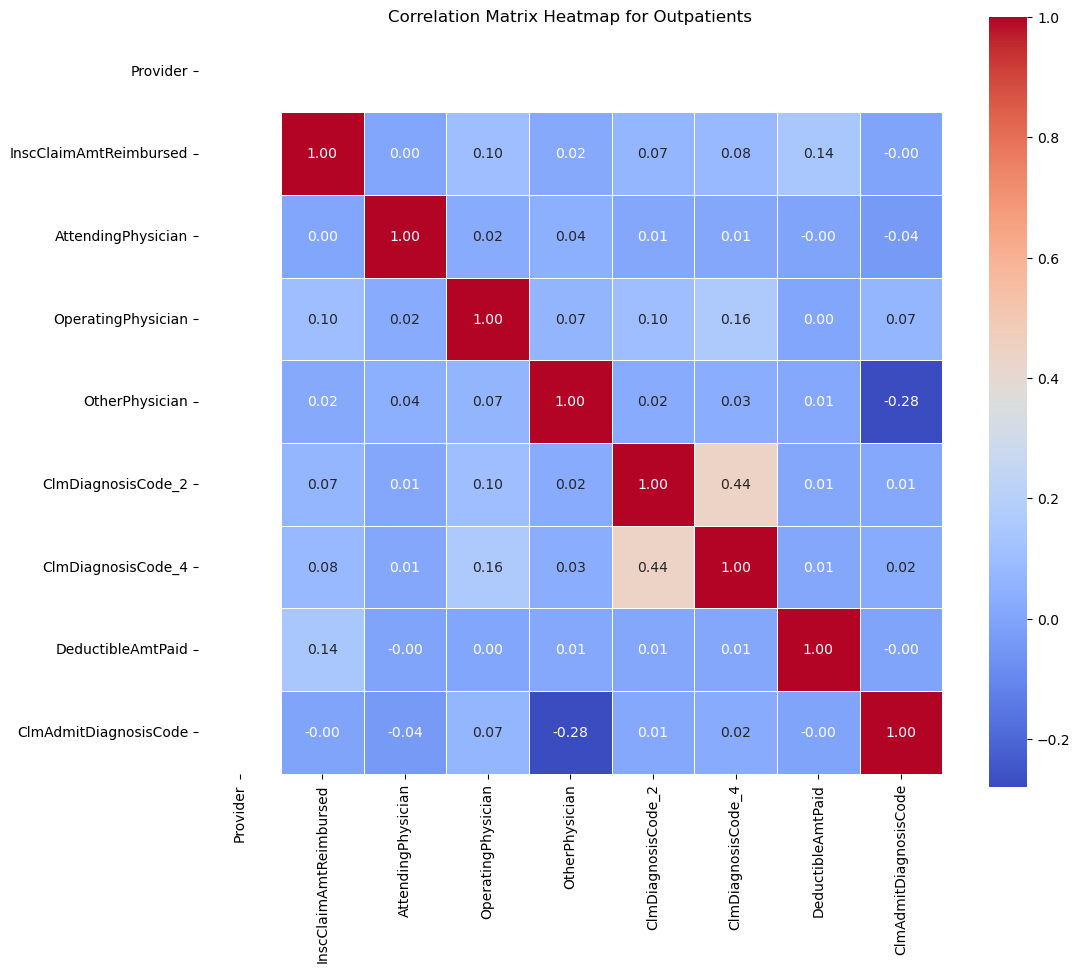

In [1358]:
# Step 5: Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix_outpatient, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)

# Step 6: Display the heatmap
plt.title('Correlation Matrix Heatmap for Outpatients')
plt.show()

In [1346]:
# Step 4: Drop highly correlated columns based on the correlation matrix
# Drop ClmDiagnosisCode_1, ClmDiagnosisCode_3, and ClmDiagnosisCode_5 as discussed
columns_to_drop = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_5']
cleaned_outpatient_data = cleaned_outpatient_data.drop(columns=columns_to_drop)

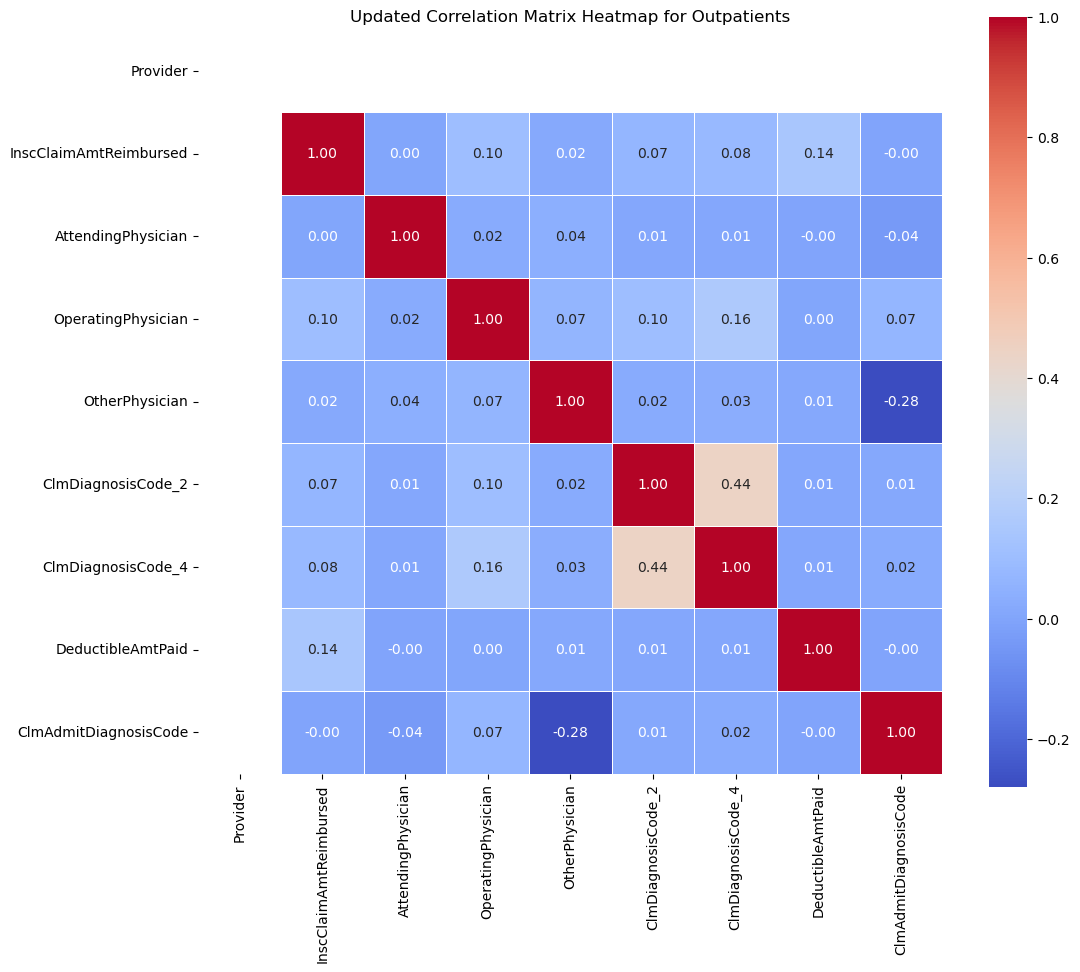

In [1359]:
# Step 5: Calculate the correlation matrix
correlation_matrix_outpatient = cleaned_outpatient_data.corr()

# Step 6: Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix_outpatient, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)

# Step 7: Display the heatmap
plt.title('Updated Correlation Matrix Heatmap for Outpatients')
plt.show()

##### IP Deductible amounts vs Reimbursed amounts for IP & OP.

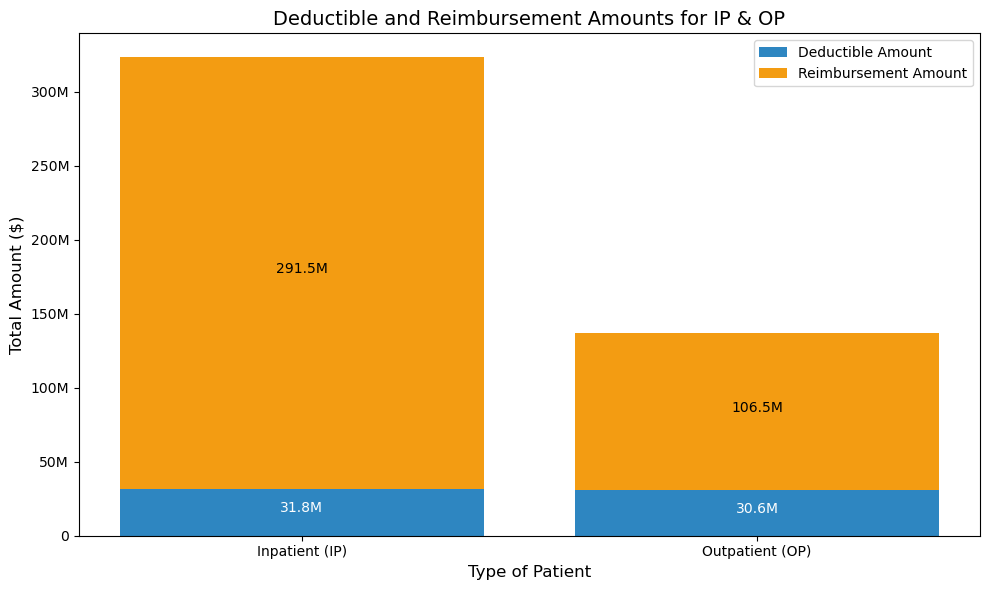

In [1348]:
# Function to format the y-axis labels
def format_y_axis(value, _):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Aggregate the data for IP
ip_total_deductible = test_beneficiary['IPAnnualDeductibleAmt'].sum()
ip_total_reimbursement = test_beneficiary['IPAnnualReimbursementAmt'].sum()

# Aggregate the data for OP
op_total_deductible = test_beneficiary['OPAnnualDeductibleAmt'].sum()
op_total_reimbursement = test_beneficiary['OPAnnualReimbursementAmt'].sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Inpatient (IP)', 'Outpatient (OP)'],
    'Deductible Amount': [ip_total_deductible, op_total_deductible],
    'Reimbursement Amount': [ip_total_reimbursement, op_total_reimbursement]
})

# Plotting
plt.figure(figsize=(10, 6))

# Stacked bar chart
plt.bar(plot_data['Category'], plot_data['Deductible Amount'], label='Deductible Amount', color='#2E86C1')
plt.bar(plot_data['Category'], plot_data['Reimbursement Amount'], 
        bottom=plot_data['Deductible Amount'], label='Reimbursement Amount', color='#F39C12')

# Add labels and title
plt.xlabel('Type of Patient', fontsize=12)
plt.ylabel('Total Amount ($)', fontsize=12)
plt.title('Deductible and Reimbursement Amounts for IP & OP', fontsize=14)

# Format y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))
plt.ylabel('Total Amount ($)', fontsize=12)

# Add a legend
plt.legend()

# Display values on the bars
for idx, row in plot_data.iterrows():
    total = row['Deductible Amount'] + row['Reimbursement Amount']
    plt.text(idx, row['Deductible Amount'] / 2, f'{row["Deductible Amount"] / 1e6:.1f}M', ha='center', color='white', fontsize=10)
    plt.text(idx, row['Deductible Amount'] + (row['Reimbursement Amount'] / 2), f'{row["Reimbursement Amount"] / 1e6:.1f}M', ha='center', color='black', fontsize=10)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

***

#### Creating the Model for prediction.

##### Split the source data into training set, validations set and test set.<br>
##### 60% training dataset.<br>
##### 20% validating dataset.<br>
##### 20% test dataset.

In [1349]:
# Merge beneficiaries data with inpatient and outpatient data
train_data = pd.merge(train_inpatient, cleaned_test_beneficiary, on='BeneID', how='left')
train_data = pd.merge(train_data, train_outpatient, on='BeneID', how='left')

In [1350]:
# Drop duplicate columns after the merge (columns with _x and _y suffixes)
train_data_clean = train_data.loc[:, ~train_data.columns.str.endswith('_y')]  # Keep only '_x' columns
train_data_clean = train_data_clean.rename(columns=lambda x: x.rstrip('_x') if x.endswith('_x') else x)  # Rename to drop '_x' suffix

In [1351]:
# Identify categorical columns (with dtype object or category)
categorical_columns = train_data_clean.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    train_data_clean[col] = label_encoder.fit_transform(train_data_clean[col].astype(str))

# The categorical columns are now encoded as numerical values

In [1352]:
# Separate numerical and categorical columns
numerical_columns = train_data_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = train_data_clean.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the median or mean
train_data_clean[numerical_columns] = train_data_clean[numerical_columns].fillna(train_data_clean[numerical_columns].median())

# Fill missing values in categorical columns with 'unknown'
train_data_clean[categorical_columns] = train_data_clean[categorical_columns].fillna('unknown')

In [1353]:
print(train_data_clean.head())

   BeneID  ClaimID  ClaimStartDt  ClaimEndDt  Provider  \
0    2141    12665           134         107      1543   
1    2141    28399           275         244      1540   
2    2141    30241           292         262      1585   
3    2163     6040            77          52       540   
4    2163     6040            77          52       540   

   InscClaimAmtReimbursed  AttendingPhysician  OperatingPhysician  \
0                   26000                7483                8287   
1                    5000                 657                 484   
2                    5000                5789                8287   
3                    5000                5542                5530   
4                    5000                5542                5530   

   OtherPhysician  AdmissionDt  ...  ChronicCond_IschemicHeart  \
0            2877          134  ...                        1.0   
1            2877          275  ...                        1.0   
2             319          292  ...   

In [1354]:
# Drop columns with '_x' and '_y' suffixes
columns_to_drop = ['FraudulentClaim_x', 'FraudulentClaim_y', 'BeneID', 'Provider_x', 'Provider_y', 'ClaimID_x', 'ClaimID_y', 'ClaimStartDt_x', 'ClaimEndDt_x', 'ClaimStartDt_y', 'ClaimEndDt_y', 'AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x', 'AttendingPhysician_y', 'OperatingPhysician_y', 'OtherPhysician_y', 'ClaimStartDt_x', 'ClaimEndDt_x', 'AdmissionDt', 'DischargeDt', 'ClaimStartDt_y', 'ClaimEndDt_y']

# Drop the identified columns
X = train_data.drop(columns=columns_to_drop)  # Features
y = train_data['FraudulentClaim_x']  # Target variable (choosing 'FraudulentClaim_x' as the target)

KeyError: "['FraudulentClaim_x', 'FraudulentClaim_y'] not found in axis"

In [1097]:
# Split the data into training and temp (validation + test) sets (60% training, 40% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temp set into validation and test sets (50% validation, 50% test of the 40% temp data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the sizes of the splits
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 7447
Validation set size: 2483
Test set size: 2483


In [1098]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [1113]:
# Identify the column containing 'V5789'
for column in X_train.columns:
    if 'V5789' in X_train[column].astype(str).values:
        print(f"Column '{column}' contains the value 'V5789'.")


Column 'ClmAdmitDiagnosisCode_x' contains the value 'V5789'.
Column 'ClmDiagnosisCode_1_x' contains the value 'V5789'.
Column 'ClmDiagnosisCode_2_x' contains the value 'V5789'.
Column 'ClmDiagnosisCode_4_x' contains the value 'V5789'.
Column 'ClmDiagnosisCode_6_x' contains the value 'V5789'.
Column 'ClmDiagnosisCode_1_y' contains the value 'V5789'.


In [ ]:
# Train the model using the training set
rf_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'V5789'

##### Feature Importance:

##### Saving the Model:

In [ ]:
# Save the best models
joblib.dump(grid_search_inpatient.best_estimator_, 'inpatient_fraud_model.pkl')
joblib.dump(grid_search_outpatient.best_estimator_, 'outpatient_fraud_model.pkl')

['outpatient_fraud_model.pkl']

In [924]:
import os
print(os.getcwd())

/Users/cesarchaparro/Desktop/TripleTen/Personal_projects/healthcare_fraud_detection


##### Loading the Model:

In [925]:
# Load the saved model
inpatient_model = joblib.load('inpatient_fraud_model.pkl')
outpatient_model = joblib.load('outpatient_fraud_model.pkl')

***

##### Application Initialization:

In [926]:
app = FastAPI()

# Load models
inpatient_model = joblib.load("inpatient_fraud_model.pkl")
outpatient_model = joblib.load("outpatient_fraud_model.pkl")

@app.post("/predict/")
def predict(data: dict):
    try:
        df = pd.DataFrame(data)  # Convert incoming JSON to DataFrame
        preprocessed_data = preprocess_data(df)  # Preprocess data as before
        predictions = inpatient_model.predict(preprocessed_data)  # Change for outpatient if needed
        return {"predictions": predictions.tolist()}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Run the API using uvicorn: uvicorn app_name:app --reload